# Concept - Neural Network
> Training a simple neural net to solve a quadratic equation. Visualizing the actual vs predicted function

- toc: true
- badges: true
- comments: true
- categories: [Concept, Keras, 3D, Visualization]
- image:

In [1]:
import numpy as np
import pandas as pd

import altair as alt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import keras
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [2]:
# Plot a 3d 
def plot3d(X,Y,Z):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='y')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
        
# Visualise the metrics from the model
def metrics(history):
    df = pd.DataFrame(history)
    df.reset_index()
    df["batch"] = df.index + 1
    df = df.melt("batch", var_name="name")
    df["val"] = df.name.str.startswith("val")
    df["type"] = df["val"]
    df["metrics"] = df["val"]
    df.loc[df.val == False, "type"] = "training"
    df.loc[df.val == True, "type"] = "validation"
    df.loc[df.val == False, "metrics"] = df.name
    df.loc[df.val == True, "metrics"] = df.name.str.split("val_", expand=True)[1]
    df = df.drop(["name", "val"], axis=1)
    
    base = alt.Chart().encode(
        x = "batch:Q",
        y = "value:Q",
        color = "type"
    ).properties(width = 300, height = 300)

    layers = base.mark_circle(size = 50).encode(tooltip = ["batch", "value"]) + base.mark_line()
    chart = layers.facet(column='metrics:N', data=df).resolve_scale(y='independent')    
    
    return chart

Classical programming is all about creating a function that helps us to process input data and get the desired output.

In the learning paradigm, we change the process so that given a set of examples of input data and desired output, we aim to learn the function that can process the data.

- In machine learning, we end up handcrafting the features and then learn the function to get the desired output
- In deep learning, we want to both learn the features and the function together to get the desired output

## Theory of Deep Learning

We will start with why deep learning works and explain the basis of Universal Approximation

Let us take a non-linear function - a saddle function

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

## Problem: A Noisy Function

In [4]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)

In [5]:
X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)*0.1

In [6]:
Z = 2*X*X - 3*Y*Y + 5*c + e

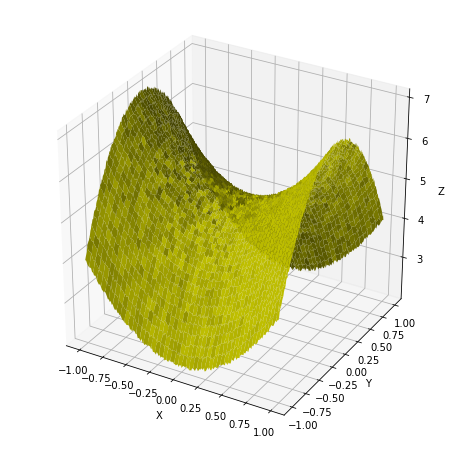

In [8]:
plot3d(X,Y,Z)

## Using Neural Network

### Step 0: Load the Keras Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense

### Step 1: Create the input and output

In [10]:
input_xy = np.c_[X.reshape(-1),Y.reshape(-1)]
output_z = Z.reshape(-1)

In [11]:
output_z.shape, input_xy.shape

((40000,), (40000, 2))

### Step 2: Create the Transformation & Prediction Model

In [12]:
model = Sequential()
model.add(Dense(64, input_dim=2,  activation="relu"))
model.add(Dense(32, input_dim=2,  activation="relu"))
model.add(Dense(1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


### Step 3: Compile the Model - Loss, Optimizer and Fit the Model

In [14]:
model.compile(loss='mean_squared_error', optimizer="sgd", metrics=["mse"])

In [15]:
%%time
output = model.fit(input_xy, output_z, epochs=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/10
1000/1000 [==============================] - 15s 2ms/step - loss: 1.2006 - mse: 1.2006 - val_loss: 1.4322 - val_mse: 1.4322
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0177 - mse: 0.0177 - val_loss: 0.9236 - val_mse: 0.9236
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.6914 - val_mse: 0.6914
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.5951 - val_mse: 0.5951
Epoch 5/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.5046 - val_mse: 0.5046
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.4786 - val_mse: 0.4786
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.4453 - val_mse: 0.4453
Epoch 8/10
1000/1000 [==============================] - 1s 1m

### Step 4: Evaluate Model Performance

In [17]:
metrics(output.history)

alt.FacetChart(...)

### Step 5: Make Prediction from the model

In [18]:
Z_pred = model.predict(input_xy).reshape(200,200)

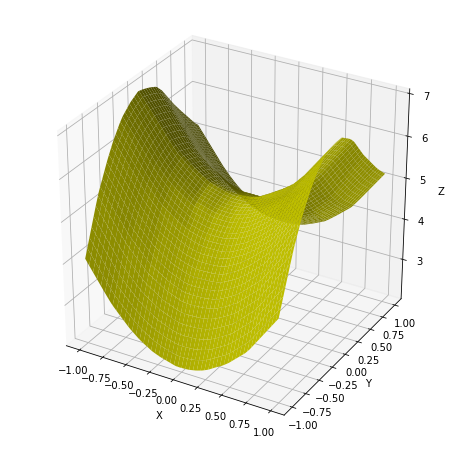

In [20]:
plot3d(X,Y,Z_pred)

## Experimentation / Questions

- Try changing the activation to a "linear" and see whether you can predict the function or not 
- Try adding more layers to the network
- Try changing the number of layers in the network